In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/ghana-crop-disease/Train.csv')

# Print the column names
print(df.columns)

Index(['Image_ID', 'confidence', 'class', 'ymin', 'xmin', 'ymax', 'xmax'], dtype='object')


In [2]:
NO_SAMPLES = 1000 # -1 for all samples
BATCH_SIZE = 16

In [3]:
# Shuffle the dataframe and take the first 1000 entries
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataframe

In [4]:
df

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
0,id_oxsug6.jpg,1.0,Corn_Streak,1090.692666,668.256400,1277.409779,717.108223
1,id_oiakvi.jpg,1.0,Corn_Cercospora_Leaf_Spot,584.106810,1725.099563,610.097061,1755.925546
2,id_dv983x.jpg,1.0,Tomato_Septoria,2264.739278,619.407649,2309.024627,653.563433
3,id_dfeeo7.jpg,1.0,Corn_Cercospora_Leaf_Spot,897.998932,3159.077568,1017.738063,3330.146751
4,id_xct61j.jpg,1.0,Corn_Common_Rust,1006.334336,892.410901,1297.129367,1414.171908
...,...,...,...,...,...,...,...
41024,id_7oxlec.jpg,1.0,Tomato_Early_Blight,1719.914203,2177.393125,1823.788452,2320.219947
41025,id_d3ngz2.jpg,1.0,Pepper_Leaf_Mosaic,206.617268,295.634296,222.603093,325.059354
41026,id_4hh3wp.jpg,1.0,Pepper_Leaf_Mosaic,1626.338194,1571.720009,1938.716997,1936.484725
41027,id_23v6m2.jpg,1.0,Pepper_Bacterial_Spot,2423.380012,1872.251509,2561.670106,1939.120004


In [5]:
# Basic Info and Data Overview
print("Data Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Counts:\n", df.nunique())
print("\nSample Data:\n", df.head())

# Summary of numeric columns
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image_ID    41029 non-null  object 
 1   confidence  41029 non-null  float64
 2   class       41029 non-null  object 
 3   ymin        41029 non-null  float64
 4   xmin        41029 non-null  float64
 5   ymax        41029 non-null  float64
 6   xmax        41029 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.2+ MB
Data Info:
 None

Missing Values:
 Image_ID      0
confidence    0
class         0
ymin          0
xmin          0
ymax          0
xmax          0
dtype: int64

Unique Counts:
 Image_ID       4902
confidence        1
class            23
ymin          30778
xmin          32249
ymax          31224
xmax          32904
dtype: int64

Sample Data:
         Image_ID  confidence                      class         ymin  \
0  id_oxsug6.jpg         1.0                Corn_Strea

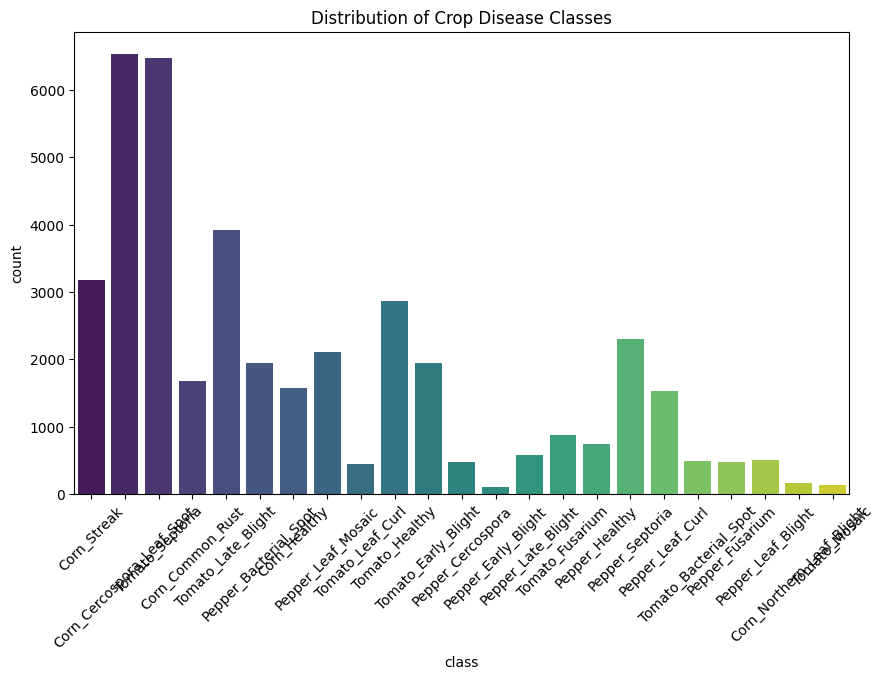

In [6]:
# 1. Distribution of Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribution of Crop Disease Classes')
plt.xticks(rotation=45)
plt.savefig("dist_dis.png")
plt.show()


In [7]:
# Extract plant name from 'class' column and convert to lowercase
df['plant'] = df['class'].str.split('_').str[0].str.lower()

# Verify the new column
print(df[['class', 'plant']].head())

                       class   plant
0                Corn_Streak    corn
1  Corn_Cercospora_Leaf_Spot    corn
2            Tomato_Septoria  tomato
3  Corn_Cercospora_Leaf_Spot    corn
4           Corn_Common_Rust    corn


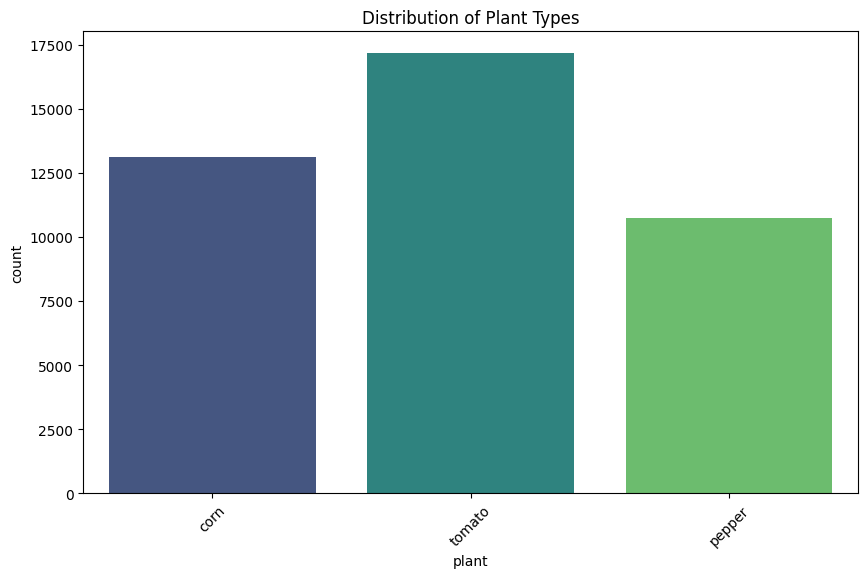

In [8]:
# Remove the 'confidence' column
df = df.drop(columns=['confidence'])

# Plot the distribution of the 'plant' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='plant', palette='viridis')
plt.title('Distribution of Plant Types')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Filter the DataFrame where the plant is "tomato"
df = df[df['class'].isin(['Tomato_Healthy', 'Tomato_Late_Blight', 'Tomato_Early_Blight', 'Tomato_Septoria'])]
# Filter the original DataFrame in place
df = df[df['plant'] == 'tomato']
if NO_SAMPLES > 0:
    df = df.head(NO_SAMPLES)  # Take the first 1000 entries
df

,Image_ID,class,ymin,xmin,ymax,xmax,plant
2,id_dv983x.jpg,Tomato_Septoria,2264.739278,619.407649,2309.024627,653.563433,tomato
6,id_8bkvtb.jpg,Tomato_Late_Blight,1476.633517,1400.625845,1603.351578,1515.372464,tomato
8,id_ltilj4.jpg,Tomato_Late_Blight,1266.932052,1437.758452,1374.795090,1537.843727,tomato
10,id_n9ef6q.jpg,Tomato_Septoria,691.715457,843.963700,720.521077,881.768150,tomato
11,id_lal9e4.jpg,Tomato_Septoria,2199.823647,1715.389181,2660.747871,2712.526296,tomato
...,...,...,...,...,...,...,...
2752,id_qn4cyl.jpg,Tomato_Late_Blight,444.525732,407.099596,481.382442,446.658816,tomato
2753,id_yvbi4o.jpg,Tomato_Late_Blight,1974.900864,2518.331518,2036.934243,2582.609504,tomato
2754,id_o6v4eb.jpg,Tomato_Septoria,2387.237600,993.338655,2492.461172,1090.737791,tomato
2755,id_lwasct.jpg,Tomato_Septoria,1041.713444,954.458955,1095.908409,1029.137127,tomato


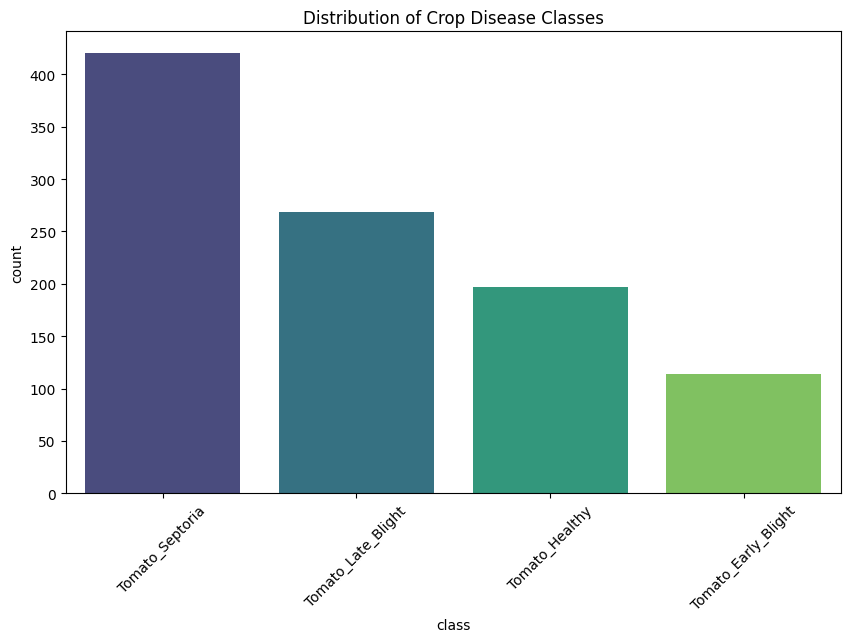

In [10]:
# 1. Distribution of Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribution of Crop Disease Classes')
plt.xticks(rotation=45)
plt.savefig("dist_dis.png")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
plant_encoder = LabelEncoder()
class_encoder = LabelEncoder()

# Fit and transform the plant and class columns
df['plant_idx'] = plant_encoder.fit_transform(df['plant'])
df['class_idx'] = class_encoder.fit_transform(df['class'])

# Display the mapping of plant and class indices
print("Plant Index Mapping:\n", dict(zip(plant_encoder.classes_, plant_encoder.transform(plant_encoder.classes_))))
print("Class Index Mapping:\n", dict(zip(class_encoder.classes_, class_encoder.transform(class_encoder.classes_))))

Plant Index Mapping:
 {'tomato': 0}
Class Index Mapping:
 {'Tomato_Early_Blight': 0, 'Tomato_Healthy': 1, 'Tomato_Late_Blight': 2, 'Tomato_Septoria': 3}


In [12]:
df

,Image_ID,class,ymin,xmin,ymax,xmax,plant,plant_idx,class_idx
2,id_dv983x.jpg,Tomato_Septoria,2264.739278,619.407649,2309.024627,653.563433,tomato,0,3
6,id_8bkvtb.jpg,Tomato_Late_Blight,1476.633517,1400.625845,1603.351578,1515.372464,tomato,0,2
8,id_ltilj4.jpg,Tomato_Late_Blight,1266.932052,1437.758452,1374.795090,1537.843727,tomato,0,2
10,id_n9ef6q.jpg,Tomato_Septoria,691.715457,843.963700,720.521077,881.768150,tomato,0,3
11,id_lal9e4.jpg,Tomato_Septoria,2199.823647,1715.389181,2660.747871,2712.526296,tomato,0,3
...,...,...,...,...,...,...,...,...,...
2752,id_qn4cyl.jpg,Tomato_Late_Blight,444.525732,407.099596,481.382442,446.658816,tomato,0,2
2753,id_yvbi4o.jpg,Tomato_Late_Blight,1974.900864,2518.331518,2036.934243,2582.609504,tomato,0,2
2754,id_o6v4eb.jpg,Tomato_Septoria,2387.237600,993.338655,2492.461172,1090.737791,tomato,0,3
2755,id_lwasct.jpg,Tomato_Septoria,1041.713444,954.458955,1095.908409,1029.137127,tomato,0,3


In [13]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
import torch

# Define a custom dataset class
class CropDiseaseDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = os.path.join(self.root_dir, f"{row['Image_ID']}")
        image = Image.open(img_path).convert("RGB")

        # Apply bounding box crop
        xmin, ymin, xmax, ymax = row["xmin"], row["ymin"], row["xmax"], row["ymax"]
        image = image.crop((xmin, ymin, xmax, ymax))

        # Apply transformations if any
        if self.transform:
            image = self.transform(image)

        label = row["class_idx"]
        return image, label

# Define the root directory for images
root_dir = "/kaggle/input/ghana-crop-disease/images/"

# Split the dataset into training and testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["class_idx"])

# Define transformations (resize, normalization, etc.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and loaders
train_dataset = CropDiseaseDataset(train_df, root_dir, transform=transform)
test_dataset = CropDiseaseDataset(test_df, root_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Example to get one batch
for images, labels in train_loader:
    print(f"Batch of images has shape: {images.shape}")
    print(f"Batch of labels has shape: {labels.shape}")
    break

Batch of images has shape: torch.Size([16, 3, 64, 64])
Batch of labels has shape: torch.Size([16])


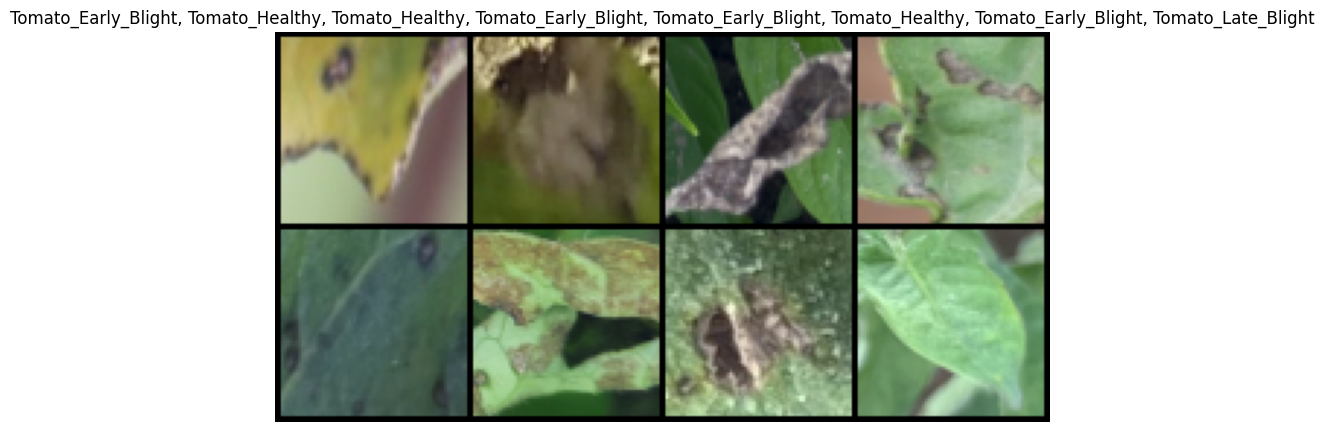

In [14]:
import matplotlib.pyplot as plt
import torchvision

# Function to display a batch of images
def show_images_from_loader(loader, class_names, num_images=8):
    # Get one batch of images and labels
    images, labels = next(iter(loader))
    
    # Take only the specified number of images
    images = images[:num_images]
    labels = labels[:num_images]

    # Create a grid of images and display
    grid_img = torchvision.utils.make_grid(images, nrow=4, normalize=True)
    plt.figure(figsize=(10, 6))
    plt.imshow(grid_img.permute(1, 2, 0))  # Rearrange dimensions for plotting
    plt.axis('off')
    
    # Print class names if available
    label_names = [class_names[label] for label in labels]
    plt.title(", ".join(label_names), fontsize=12)
    plt.show()

# Assuming you have a DataLoader called `train_loader` and a list of class names
class_names = df["class"].unique().tolist()  # Replace with an actual list of class names
show_images_from_loader(train_loader, class_names)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

# Define number of classes
num_classes = df["class_idx"].nunique()

# Training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    return epoch_loss

# Evaluation function
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluating"):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total
    return epoch_loss, accuracy

In [16]:
# Load a pre-trained ResNet model
model = models.densenet201(pretrained=True)
# Modify the final layer to match the number of classes

FREEZE = False
# Freeze all layers in the base model
for param in model.parameters():
    param.requires_grad = not FREEZE

# Modify the final layer to match the number of classes and unfreeze it
model.classifier = nn.Linear(model.classifier.in_features, num_classes) #.fc for resnet

# Only the parameters in the final layer should have requires_grad = True
for param in model.classifier.parameters(): #.fc for resnet
    param.requires_grad = True


# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 96.9MB/s]


In [17]:
# Training loop
num_epochs = 4
for epoch in range(num_epochs):
    print(f"Epoch [{epoch+1}/{num_epochs}]")

    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    test_loss, accuracy = evaluate_model(model, test_loader, criterion, device)

    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%\n")

Epoch [1/4]


Evaluating: 100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Train Loss: 1.1290, Test Loss: 2.8827, Accuracy: 60.00%

Epoch [2/4]


Evaluating: 100%|██████████| 13/13 [00:22<00:00,  1.74s/it]


Train Loss: 0.8534, Test Loss: 0.7062, Accuracy: 71.00%

Epoch [3/4]


Evaluating: 100%|██████████| 13/13 [00:21<00:00,  1.66s/it]


Train Loss: 0.7406, Test Loss: 0.7117, Accuracy: 69.50%

Epoch [4/4]


Evaluating: 100%|██████████| 13/13 [00:20<00:00,  1.60s/it]

Train Loss: 0.7763, Test Loss: 0.7920, Accuracy: 73.50%



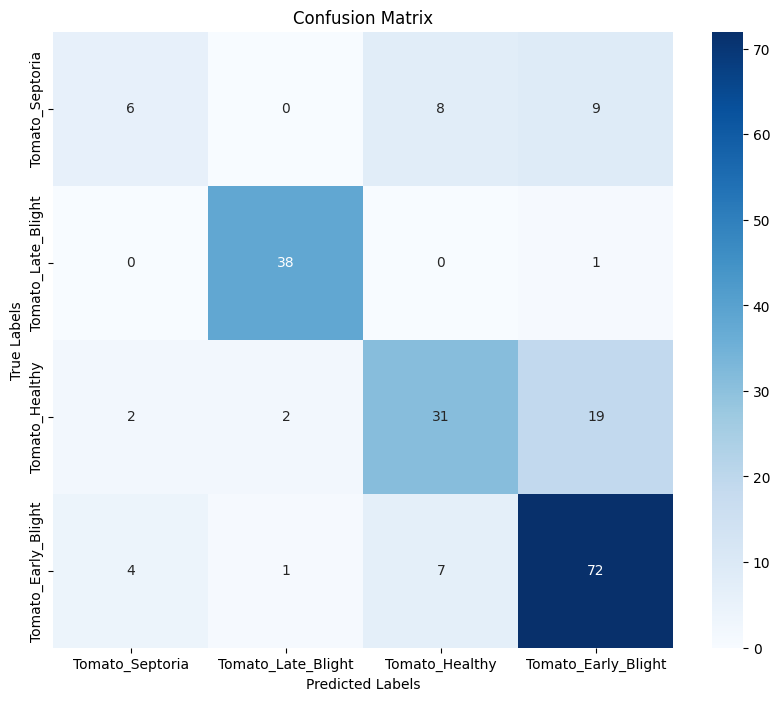

Accuracy: 0.7350
Recall: 0.7350
Precision: 0.7196
F1 Score: 0.7190
Error Rate: 0.2650
Computation Time: 20.81 seconds
AUC Score: 0.8626


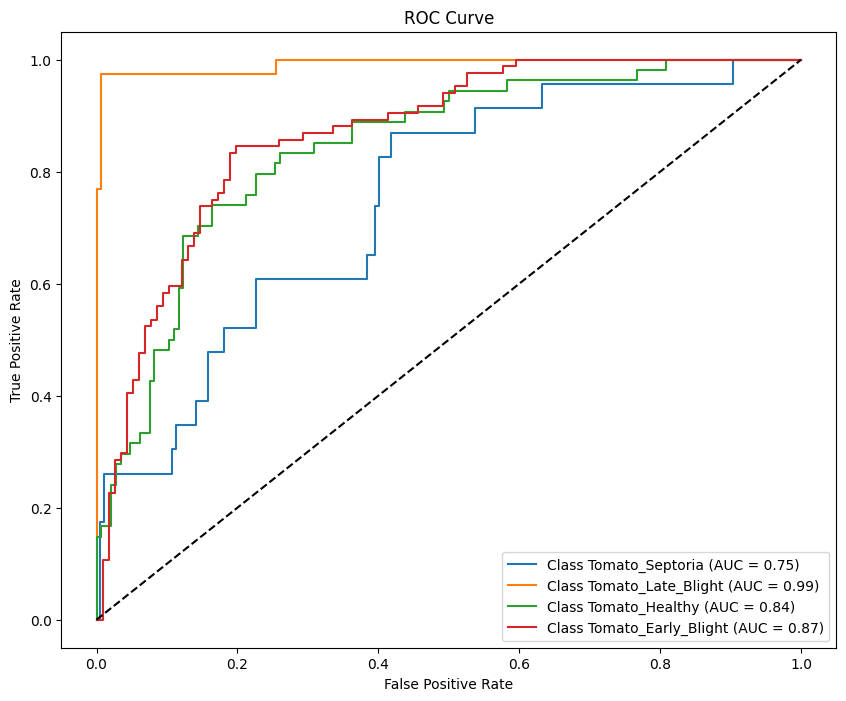

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import torch
import time

# Function to plot confusion matrix
def plot_confusion_matrix(model, dataloader, class_names, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    all_probs = []
    
    start_time = time.time()
    
    # Iterate over the dataloader to get predictions and labels
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1) 
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Calculate performance metrics
    accuracy = accuracy_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    error_rate = 1 - accuracy

    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Error Rate: {error_rate:.4f}")

    # Compute and print computation time
    computation_time = time.time() - start_time
    print(f"Computation Time: {computation_time:.2f} seconds")
    
    # Plot ROC and calculate AUC for multi-class
    all_labels_bin = label_binarize(all_labels, classes=range(len(class_names)))  # Binarize labels
    auc_score = roc_auc_score(all_labels_bin, all_probs, average="macro", multi_class="ovr")

    print(f"AUC Score: {auc_score:.4f}")

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(all_labels_bin[:, i], np.array(all_probs)[:, i])
        plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {roc_auc_score(all_labels_bin[:, i], np.array(all_probs)[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    

# Assuming class names are available
class_names = df["class"].unique()  # Replace with your actual class names if available

# Plot the confusion matrix
plot_confusion_matrix(model, test_loader, class_names, device)

In [19]:
import torch

# Save model's state dictionary
model_save_path = "model.pth"  # Define the path to save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model.pth
